# ANALIZA PUTK

## UVOD

Človeku bi se morda lahko zazdelo, da je kokoš kokoš. Rjava, morda malo črna ... Kokoš. Izkaže se, da je različnih pasem (oziroma vrst, kakor jih bom imenovala v nadaljevanju) z niansami precej več, kot bi si človek sprva predstavljal. 

Podatke o 179 različnih kokošjih vrstah sem 5. 11. 2020 zajela s spletne strani [BackYardChickens](https://www.backyardchickens.com/). Gre za spletno stran, namenjeno vsem vzrediteljem in ljubiteljem kokoši ter ostale perjadi. V zavihku [Reviews](https://www.backyardchickens.com/reviews/categories/chicken-breeds.2/), od koder sem tudi zajemala podatke, je zabeleženih več kot 170 različnih vrst kokoši in njihovih lastnost, poleg tega pa je uporabnikom spletne strani omogočeno tudi ocenjevanje in komentiranje vsake vrste.
Zato sem se odločila, da analizo razdelim na dva dela; v prvem delu se bomo posvetili kokšim in njihovim lastnostim, v drugem pa odzivu uporabnikov na posamezno vrsto. 

Najprej se seznanimo z vsemi podatki, ki sem jih zajela o posamični. Slovenskim imenom in angleškim prevodom v oklepaju, ki se bodo ujemajli z imeni stolpcev v tabelah, bodo po potrebi sledia še krajša pojasnila.

Podatki o odzivu uporabnikov na vrsto:
- povezava do spletne strani kokoši (link)
- vrsta (breed)
- ocena (mark): številčna ocena med 1 in 5
- število ocen (number of ratings)
- število komentarjev (number of comments)
- število pisnih ocen (number of reviews): število pisnih ocen, kjer uporabniki poleg števične ocene podajo še prednosti in slabosti vrste ter svoje mnenje o njej
- število ogledov (number of views)

Podatki o lastnostih kokoši:
- vrsta (breed)
- tendenca sedenja na jajcu ([broodiness](https://en.wikipedia.org/wiki/Broodiness))
- podnebna toleranca (climate tolerance): kakšno podnebje vrsta prenaša bolje
- količina jajc (egg productivity)
- velikost jajc (egg size)
- velikost vrste (breed size)
- barva jajc (egg colour)
- barva vrste (breed colour)
- oblika grebena (comb)
- namen (purpose): se vrsta goji zaradi mesa in jajc, ali je bolj dekorativnega značaja
- temperament (temperament)

#### O pridobivanju podatkov
Kot je omenjeno že prej, sem podatke pridobila s spletne strani [BackYardChickens](https://www.backyardchickens.com/reviews/categories/chicken-breeds.2/), in sicer z razdelka [Reviews](https://www.backyardchickens.com/reviews/).
Kodo za zajem in obdelavo podatkov ter vse podatke lahko najdete na mojem [GitHub profilu](https://github.com/MancaStrah/Analiza-putk). Natančneje, v datoteki [zajemi-in-analiziraj-putko.py](https://github.com/MancaStrah/Analiza-putk/blob/main/zajemi-in-analiziraj-putko.py) je koda za zajem podatkov, v mapi [obdelani-podatki](https://github.com/MancaStrah/Analiza-putk/tree/main/obdelani-podatki) pa so datoteke z že prečiščenimi podatki.

## ZAČETNI PODATKI

Za začetek si oglejmo osnovno tabelo podatkov, s katero bomo delali. v njej so zajeti vsi podatki o odzivih uporabnikov na posamezne vrste in pa nekaj lastnosti vrst (takšne, kjer je lastnost lahko le ena, npr. velikost vrste, ne pa tudi tistih, kjer jih je lahko več, npr. barva perja).



In [1]:
import pandas as pd
putke = pd.read_csv('../Analiza-putk/obdelani-podatki/putke.csv', index_col='breed')
del putke['link']
putke

,mark,number of ratings,number of comments,number of reviews,number of views,broodiness,climate tolerance,egg productivity,egg size,breed size
breed,,,,,,,,,,
Aloha Chickens,4.75,4.0,11.0,4.0,16334,average,warmer better,high,small,large
Altsteirer Styrian Hen,3.00,1.0,1.0,NaN,6471,rare,NaN,high,medium,medium
Amber Star Hybrid,4.36,11.0,15.0,11.0,21612,rare,any,high,medium,large
Amber Whites,4.57,7.0,7.0,7.0,18679,rare,any,high,large,large
Ameraucana,4.21,261.0,343.0,256.0,170825,average,any,medium,medium,large
...,...,...,...,...,...,...,...,...,...,...
White Star Hybrid,4.38,8.0,22.0,8.0,22339,rare,warmer better,high,medium,large
Whiting True Blue,4.50,2.0,6.0,1.0,17384,poor,colder better,high,large,NaN
Whiting True Green,4.00,1.0,NaN,1.0,10570,poor,colder better,high,large,NaN


In [2]:
stevilo_vrst = len(putke)
stevilo_vrst

179

Kot vidimo, je zabeleženih 179 različnih vrst kokoši.

## ANALIZA KOKOŠJIH VRST

### Uvod

Začnimo z analizo kokošjih vrst. Za to bomo poleg podatkov, zbranih v zgoraj prikazani tabeli `putke`, potrebovali še podatke o barvi, temperamentu namenu in obliki grebena vrste ter o barvi jajc.  

In [3]:
jajca = pd.read_csv('../Analiza-putk/obdelani-podatki/barva_jajc.csv')
barva = pd.read_csv('../Analiza-putk/obdelani-podatki/barva_vrste.csv')
greben = pd.read_csv('../Analiza-putk/obdelani-podatki/comb.csv')
namen_vrste = pd.read_csv('../Analiza-putk/obdelani-podatki/purpose.csv')
temperament = pd.read_csv('../Analiza-putk/obdelani-podatki/temperament.csv')

Za preglednejšo analizo bomo iz prvotne tabele `putke` odstranili trenutno irelevantne podatke.

In [4]:
del putke['mark']
del putke['number of ratings']
del putke['number of comments']
del putke['number of reviews']
del putke['number of views']

Sedaj imamo pred sabo vse potrebne podatke in lahko začnemo z analizo.

Najprej se bomo seznanili z našimi kokošmi, zato poglejmo, koliko jih je in kakšen je njihov namen. 

breed purpose
brooding        1
pet             1
ornamental     47
meat           76
eggs          102
dtype: int64

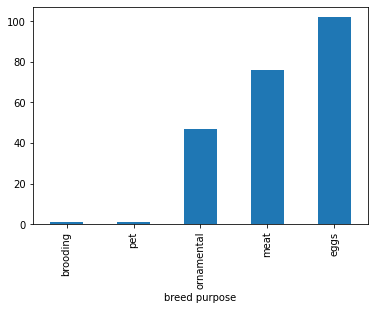

In [5]:
namen = pd.merge(putke, namen_vrste, left_on='breed', right_on='breed')
namen
namen.groupby('breed purpose').size().sort_values().plot.bar()
stevilo = namen.groupby('breed purpose').size().sort_values()
stevilo

In [6]:
odstotek = namen.groupby('breed purpose').size().sort_values().apply(lambda x: 100*x/stevilo_vrst)
odstotek

breed purpose
brooding       0.558659
pet            0.558659
ornamental    26.256983
meat          42.458101
eggs          56.983240
dtype: float64

Od 179 vrst kokoši jih 57,0 % nesnic, to sta 102 vrsti. 42,5 % jih vzrejajo tudi za meso, to je 76 vrst. 47 vrst, 26,3 %, jih je okrasnih, delež tistih, ki pa so zgolj kot hišni ljubljenčki ali pa zgolj za valjenje, je zanemarljiv. 
Poglejmo, koliko kokoši je uporabnih tako za jajca kot tudi za meso.

In [7]:
meso_ali_jajca = namen[(namen['breed purpose'] == 'eggs') | (namen['breed purpose'] == 'meat')]
oboje = (meso_ali_jajca.groupby('breed').count())[(meso_ali_jajca.groupby('breed').count())['breed purpose'] == 2]
za_oboje = len(oboje)
za_oboje

71

In [8]:
za_oboje/102

0.696078431372549

In [9]:
za_oboje/76

0.9342105263157895

Ugotovimo, da je 71 kokošjih vrst uporabnih za jajca in za meso, torej je večina tistih za meso (93,4 %) tudi nesnic, medtem ko je le 70 % nesnic gojenih tudi zavoljo mesa.



Preverimo sedaj še eno izmed hipotezi, in sicer tole: 
> Kokoši, ki jih vzrejajo tako za meso kot tudi za jajca, so večje od tistih, ki jih vzrejajo le za jajca.


breed size
medium     4
small      5
large     61
dtype: int64

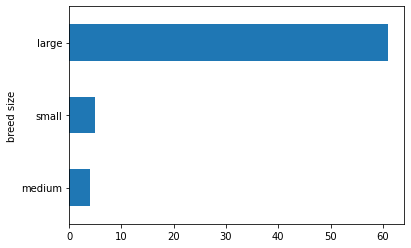

In [10]:
oboje['breed size'] = putke['breed size']
stevilo_kokosi_za_meso_in_jajca = oboje.groupby('breed size').size()
stevilo_kokosi_za_meso_in_jajca.sort_values().plot.barh()
stevilo_kokosi_za_meso_in_jajca.sort_values()

In [11]:
za_jajca = namen[namen['breed purpose'] == 'eggs']
stevilo_kokosi_za_jajca = za_jajca.groupby('breed size').size()

breed size
medium     2
small      2
large     23
dtype: int64

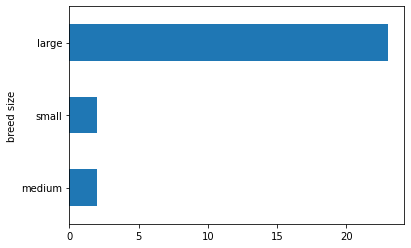

In [12]:
stevilo_kokosi_samo_za_jajca = stevilo_kokosi_za_jajca - stevilo_kokosi_za_meso_in_jajca
stevilo_kokosi_samo_za_jajca.sort_values().plot.barh()
stevilo_kokosi_samo_za_jajca.sort_values()

Opazimo, da med kokošmi, namenjeni jajcem in mesu, prevladujejo velike vrste, in prav nič drugače ni pri kokošjih vrstah, ki so le nesnice, zato lahko hipotezo, ki pravi, da so kokoši, ki so le nesnice, manjše, ovržemo.

### Oblika grebena

Sedaj bomo preučili oblike grebenov kokoši in našli najpogostejšega, s čimer bomo potrdili ali pa ovrgli našo hipotezo:
> Večina kokoši ima greben v obliki lista.


##### O grebenih
Greben je nazobčan izrastek na vrhu kokošje glave. Običajno je rdeče barve, nekatere vrste pa imajo tudi temnejše, na primer rdeče, pomešane z odtenki vijolične ali pa črne. 
Za kokoši je greben precej pomemben, saj jim pomaga regulirati telesno temperaturo - zaradi zvišane temperature v okolju se kri po kokošjem telesu pretaka hitreje in zato pogosteje doseže greben, kjer se ohladi. Prav zato imajo običajno kokoši, ki živijo v toplejšem okolju, večje grebene.
Poleg tega je greben v kokošjem svetu tudi statusni simbol in  precej pomemben pri parjenju, saj samice intrigirajo samci z večjimi in bolj živimi grebeni.
Tudi rejcu greben pove precej o zdravju kokoši.

Več o pomenu grebena si lahko preberete na spletnih straneh [Chickens & More](https://www.chickensandmore.com/chicken-comb/), [The Happy Chicken Coop](https://www.thehappychickencoop.com/chicken-comb/) ali [Chicken Scratch](https://cs-tf.com/chicken-comb/), mi pa se bomo posvetili še oblikam grebena.

Poznamo devet oblik:
![oblike grebenov](combs.jpg)

Dodajmo jim še približke slovenskih prevodov:
- buttercup: dvojni list
- carnation: nagelj
- cushion: kot blazinica
- pea: grahast
- single: list
- rose: v obliki rože
- strawbery: v obliki jagode
- v-comb: v obliki črke v
- walnut: v obliki oreščka



Poglejmo sedaj, kakšnih oblik so grebeni naših kokoši upoštevajoč dejstvo, da se pri posamezni vrsti lahko pojavi več različnih oblik grebena.

comb
single       51.933702
pea          15.469613
rose          6.077348
v-shaped      4.419890
walnut        3.867403
buttercup     1.104972
any           1.104972
cushion       0.552486
dtype: float64

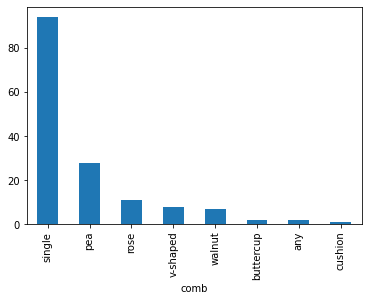

In [13]:
putke_z_grebeni = pd.merge(putke, greben, left_on='breed', right_on='breed')
stevilo_putk = len(putke_z_grebeni)
grebeni = putke_z_grebeni.groupby('comb').size().sort_values(ascending=False)
grebeni.plot.bar()
odstotki = (grebeni/stevilo_putk) * 100
odstotki

Polovica kokošjih vrst, natančneje 51,9 %, ima greben v obliki lista, torej lahko našo hipotezo potrdimo.
Drugi najpogostejši je grahast greben, ki ga najdemo na 15,5 % vrst, sledijo pa mu grebeni v obliki rože, črke v in oreščka. Dvojni list in blazniica sta zelo redka.

### Ornamentalne kokoši

V tem delu analize se bomo posvetili ornamentalnim kokošim in preverili, ali velja naša hipoteza s tega področja:
> Ornamentalne kokoši ležejo manjša jajca in to počnejo redkeje.

In [14]:
ornamentalne = namen[namen['breed purpose'] == 'ornamental']
neornamentalne = namen[namen['breed purpose'] != 'ornamental']
prestete_neornamentalne = neornamentalne.groupby('breed').count()
prestete_neornamentalne['egg size'] = putke['egg size']
prestete_neornamentalne['egg productivity'] = putke['egg productivity']
neornamentalne_velikost_jajc = prestete_neornamentalne.groupby('egg size').size()
neornamentalne_produktivnost = prestete_neornamentalne.groupby('egg productivity').size()
ornamentalne_velikost_jajc = ornamentalne.groupby('egg size').size().sort_values()
ornamentalne_produktivnost = ornamentalne.groupby('egg productivity').size().sort_values()

Poglejmo si najprej razlike v velikosti jajc.

In [15]:
stevilo_ornamentalnih = len(ornamentalne)
stevilo_ornamentalnih

47

egg size
large      4.255319
medium    40.425532
small     55.319149
dtype: float64

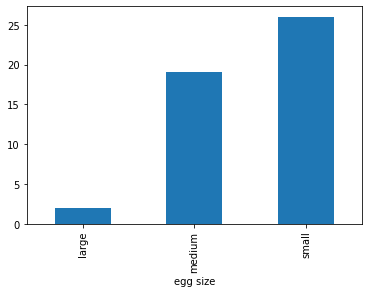

In [16]:
ornamentalne_velikost_jajc.sort_values().plot.bar()
(ornamentalne_velikost_jajc/stevilo_ornamentalnih)*100

Ornamentalnih vrst je 47, od tega jih 55,3 % res leže majhna jajca, 40,4 % pa srednje velika. Velika jajca leže le 4,3 % okrasnih kokoši, kar se zaenkrat ujema z našimi pričakovanji. 
Poglejmo, ali neornamentalne kokoši ležejo večja jajca.

In [17]:
stevilo_neornamentalnih = len(prestete_neornamentalne)
stevilo_neornamentalnih

133

egg size
large     39.849624
medium    35.338346
small      9.022556
dtype: float64

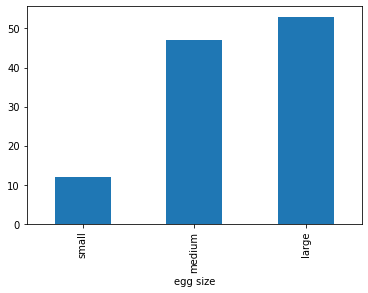

In [18]:
neornamentalne_velikost_jajc.sort_values().plot.bar()
(neornamentalne_velikost_jajc/stevilo_neornamentalnih)*100

Naša predvidevanja so bila pravilna, 39,8 % neornamentalnih kokoši leže velika jajca, 35,3% pa srednje velika.
Majhna jajca ima le 9 %.
Posvetimo se še produktivnosti oziroma temu, kako pogosto ležejo.

egg productivity
high       2.127660
low       40.425532
medium    51.063830
dtype: float64

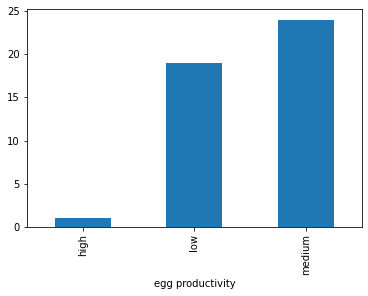

In [19]:
ornamentalne_produktivnost.sort_values().plot.bar()
(ornamentalne_produktivnost/stevilo_ornamentalnih)*100

Največ, 51 % okrasnih kokoši jajca leže srednje pogosto, 40,4 % pa to počne redko. Veliko jajc izležeta le dva odstotka. Oglejmo si, kako je s tem pri neokrasnih.

egg productivity
high      33.834586
low        5.263158
medium    40.601504
dtype: float64

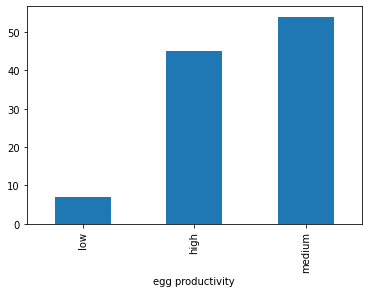

In [20]:
neornamentalne_produktivnost.sort_values().plot.bar()
(neornamentalne_produktivnost/stevilo_neornamentalnih)*100

Tudi med neornamentalnimi kokošmi s 40,6 % odstotki prevladuje srenje pogosto valjenje, dobra tretjina, torej 33,8 % pa jih leže zelo pogosto. Redko leže le 5,3 % teh kokoši, torej lahko potrdimo našo hipotezo, da okrasne kokoši ležejo manjša jajca in to počnejo redkeje kot neornamentalne.

## ANALIZA ODZIVA UPORABNIKOV

V tem delu se bomo posvetili odzivom uporabnikov spletne strani [BackYardChickens](https://www.backyardchickens.com/) na kokošje vrste in odgovorili na vprašanje, ali sta bili naši hipotezi pravilin:
> Največ ogledov imajo vrste, ki jih vzrejajo predvsem zaradi jajc.

> Večina najbolje ocenjenih kokoši je nesnic.

### Število ogledov

Za začetek ustvarimo novo tabelo, takšno, ki bo vsebovala sedaj pomembne podatke, in si oglejmo povprečja.

In [21]:
uporabniki_putke = pd.read_csv('../Analiza-putk/obdelani-podatki/putke.csv', index_col='breed')
del uporabniki_putke['link']
uporabniki_putke.mean()

mark                      4.237738
number of ratings        38.666667
number of comments       48.018182
number of reviews        38.975309
number of views       32217.910615
dtype: float64

Ocenjevalci kokoši očitno niso preveč strogi, saj je povprečna ocena vrste 4,24, je pa res, da si relativno malo ljudi dejansko vzame čas, da vrsto oceni - glede na povprečnih 32218 ogledov je 39 ocen res precej malo. 
Hkrati pa podatek, da je povprečno število ocen (ratings) in utemeljenih ocen (reviews) skorajda enako (razlikujeta se za 0,3 odstotne točke), pove, da si večina uporabnikov, ki se odloči oceniti kokoš, vzame čas, da svojo oceno podkrepi s prednostmi in slabostmi vrste, kar nam zagotavlja, da so ocene bolj zanesljive (prihajajo od ljudi, ki imajo z vrsto res izkušnje in jo poznajo).
Število komentarjev v povprečju presega število (utemeljenih) ocen, kar je pričakovano, saj komentarji za razliko od ocen vsebujejo tudi vprašanja, izmenjave mnenj in splošne zapise o lastnem mnenju o vrsti.

In [22]:
uporabniki_putke.sort_values('number of views', ascending=False)['number of views']

breed
Belgian D' Uccle          195823
Black Sex Link Chicken    181892
Australorp                172183
Barred Rock               171968
Ameraucana                170825
                           ...  
Mixing Chickens             1116
Olandsk Dwarf                846
Green Queen                  787
Bantam Orpington             604
Hy-line Layers               199
Name: number of views, Length: 179, dtype: int64

Največ, kar 195823, ogledov ima vrsta Belgian D' Uccle. Poglejmo, ali so ta in ostale najbolj obiskane vrste res večinoma nesnice. Določimo za najbolj gledane tiste, ki imajo več kot 50000 ogledov.

In [23]:
najbolj_gledane = uporabniki_putke[uporabniki_putke['number of views'] >= 50000].copy()
stevilo_najbolj_gledanih = len(najbolj_gledane)
nameni_vrste = pd.read_csv('../Analiza-putk/obdelani-podatki/purpose.csv', index_col='breed')
gledane_in_nameni = pd.merge(najbolj_gledane, nameni_vrste, left_on='breed', right_on='breed')
najbolj_gledane.sort_values('number of views', ascending=False)['number of views']

breed
Belgian D' Uccle           195823
Black Sex Link Chicken     181892
Australorp                 172183
Barred Rock                171968
Ameraucana                 170825
Easter Eggers              152566
Golden Sex Link            149149
Orpington                  142583
Silkie                     129995
Rhode Island Red           127255
Wyandotte                  116764
Welsummer                  113223
Marans                     112711
Red Sex Link               110319
Brahma                      97886
Jersey Giant                97440
Leghorn                     89913
Cochin                      83942
Plymouth Rock               82998
Sapphire Gem                81683
Bielefelder                 76140
Polish                      76114
Sussex                      72981
Delaware                    71443
Old English Game Bantam     69467
Araucana                    66227
Dominique                   66205
Serama                      65031
Barnevelder                 59615
Olive Eg

In [24]:
stevilo_najbolj_gledanih

34

In [25]:
gledane_in_nameni.groupby('breed purpose').size()

breed purpose
eggs          27
meat          22
ornamental     6
dtype: int64

In [26]:
stevilo_putk_z_vec_kot_enim_namenom = len((gledane_in_nameni.groupby('breed').count())[(gledane_in_nameni.groupby('breed').count())['breed purpose'] >= 2])
stevilo_putk_z_vec_kot_enim_namenom

22

Izkaže se, da so najbolj gledane vrste, ki imajo več kot en namen, res pa je, da je večina (27 od 34) nesnic, zato bomo hipotezo, da so najbolj gledane nesnice, potrdili.

### Najboljše ocene

In [27]:
najbolje_ocenjene = uporabniki_putke[uporabniki_putke['mark'] >= 4.5].copy()
najbolje_ocenjene.sort_values('mark', ascending=False)

,mark,number of ratings,number of comments,number of reviews,number of views,broodiness,climate tolerance,egg productivity,egg size,breed size
breed,,,,,,,,,,
Gallo Kelso,5.00,2.0,8.0,2.0,22806,frequent,any,medium,medium,large
Columbian Blacktails,5.00,1.0,2.0,1.0,6372,average,any,high,medium,large
Russian Crested,5.00,2.0,7.0,1.0,5299,NaN,any,medium,large,large
Pita Pinta,5.00,1.0,4.0,NaN,5717,NaN,warmer better,NaN,NaN,medium
Smaaland,5.00,1.0,1.0,NaN,5728,frequent,colder better,high,medium,medium
KraienkÃ¶ppe,5.00,3.0,1.0,2.0,9315,average,any,high,large,large
Gallo Giro,5.00,1.0,1.0,1.0,8029,frequent,any,medium,medium,large
East Frisian Gull - An Old World Landrace,5.00,3.0,4.0,2.0,7758,NaN,NaN,NaN,NaN,NaN
Cuckoo Maran,5.00,1.0,1.0,NaN,2553,average,colder better,medium,large,large


Hitro opazimo, da so na vrhu, med najbolje ocenjenimi, tudi kokoši, ki imajo le en glas - eno samo petico. Seveda to ni najbolj merodajen podatek, zato si postavimo nov kriterij: za "dobro" kokoš naj bo ocena višja od 4,7, število glasov pa naj bo (glede na povprečnih 38) vsaj 15.

In [28]:
najbolje_ocenjene2 = uporabniki_putke[(uporabniki_putke['mark'] >= 4.5) & (uporabniki_putke['number of ratings'] >= 15)].copy()
najbolje_ocenjene2.sort_values('mark', ascending=False)

,mark,number of ratings,number of comments,number of reviews,number of views,broodiness,climate tolerance,egg productivity,egg size,breed size
breed,,,,,,,,,,
Nankin Bantams,4.94,16.0,13.0,15.0,13164,frequent,any,medium,small,small
Russian Orloff,4.75,16.0,18.0,15.0,56323,average,any,medium,medium,large
Modern Game,4.72,18.0,24.0,17.0,18315,frequent,warmer better,low,small,small
Showgirl,4.72,18.0,23.0,18.0,34881,frequent,any,medium,small,small
Belgian D' Anver,4.69,26.0,12.0,25.0,28687,frequent,any,medium,small,small
Crevecoeur,4.67,15.0,22.0,15.0,20782,rare,any,low,medium,large
Belgian D' Uccle,4.66,80.0,53.0,77.0,195823,average,any,medium,small,small
Icelandic Or Viking Hen,4.63,16.0,20.0,16.0,23995,average,any,medium,medium,large
Serama,4.62,47.0,60.0,47.0,65031,frequent,warmer better,low,small,small


Tako bo bolje. Poglejmo, kaj počnejo najbolje ocenjene kokoši.

In [29]:
stevilo_najbolje_ocenjenih = len(najbolje_ocenjene2)
ocenjene_in_nameni = pd.merge(najbolje_ocenjene2, nameni_vrste, left_on='breed', right_on='breed')
najbolje_ocenjene2.sort_values('mark', ascending=False)['mark']

breed
Nankin Bantams             4.94
Russian Orloff             4.75
Modern Game                4.72
Showgirl                   4.72
Belgian D' Anver           4.69
Crevecoeur                 4.67
Belgian D' Uccle           4.66
Icelandic Or Viking Hen    4.63
Serama                     4.62
Dutch                      4.59
Naked Neck-turken          4.56
Salmon Favorelle           4.56
Sussex                     4.53
Langshan                   4.52
Legbar                     4.52
Sultan                     4.50
Name: mark, dtype: float64

In [30]:
stevilo_najbolje_ocenjenih

16

In [31]:
ocenjene_in_nameni['breed purpose']

breed
Belgian D' Anver           ornamental
Belgian D' Uccle           ornamental
Crevecoeur                       eggs
Crevecoeur                       meat
Dutch                      ornamental
Icelandic Or Viking Hen          eggs
Icelandic Or Viking Hen          meat
Langshan                         eggs
Langshan                         meat
Legbar                           eggs
Legbar                           meat
Modern Game                ornamental
Naked Neck-turken                eggs
Naked Neck-turken                meat
Nankin Bantams                   eggs
Nankin Bantams                   meat
Russian Orloff                   eggs
Russian Orloff                   meat
Salmon Favorelle                 eggs
Salmon Favorelle                 meat
Serama                     ornamental
Showgirl                   ornamental
Sultan                     ornamental
Sussex                           eggs
Sussex                           meat
Name: breed purpose, dtype: object

In [32]:
ocenjene_in_nameni.groupby('breed purpose').size()

breed purpose
eggs          9
meat          9
ornamental    7
dtype: int64

Med najbolje ocenjenimi pa kokošni nesnice ne prevladujejo. Devet od 16 najbolje ocenjenih kokoši je gojenih tako za jajca kot za meso, sedem pa je okrasnih. Našo hipotezo, da so najbolje ocenjene nesnice, ovržemo.

### Komentarji in ogledi
Poglejmo še, kako je število komentarjev povezano s številom ogledov.

<AxesSubplot:xlabel='number of views', ylabel='number of comments'>

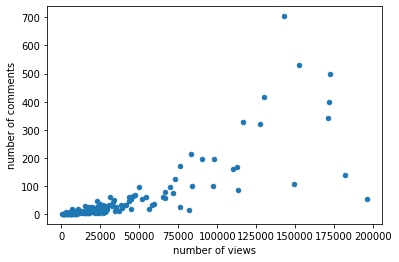

In [33]:
uporabniki_putke.plot.scatter(x="number of views", y='number of comments')

Kokošje vrste z malo ogledi (manj od 50000) imajo tudi malo komentarjev, z več ogledi pa načeloma pride tudi več komentarjev, čeprav to ni nujno, saj ima najbol ogledana vrsta (že prej smo ugotovili, da je to Belgian D' Uccle) ob skoraj 200000 ogledih manj kot 100 komentarjev.

![kokoš](putka.jpg)